In [1]:
# define universe
#f = 'KOSPI200 F201812 181010'
#f = 'KOSPI200 F201812 181010'
#f = 'K200 F 201903 190219'
f = 'KOSPI200 F201906 190426'
p_name = 'KOSPI 200 F'
pair = ['K200', 'K200F']
cd = pair[0]

# trading strategy determinants
threshold = 0.5   # absolute value

path = './data/'

In [2]:
import pandas as pd
import numpy as np
import datetime as dt
import finterstellar as fs

In [3]:
ld = fs.LoadData()
df = ld.read_intraday_csv(path, f)

In [4]:
prices_df = df.loc[:,['K200F','K200']].copy()

In [5]:
valuation = fs.Valuation()
trd = fs.IntradayFuturesTradeOnBasis()

r = 0.02
d = 0.005
t0 = pd.to_datetime('2019-02-19')
T = pd.to_datetime('2019-03-14')

sample = trd.basis_calculate(df, pair)
sample = trd.price_analyze(df, threshold, pair)
book = trd.create_trade_book(df, pair)
book = trd.tradings(df, book, threshold, pair)
book = trd.position(book, pair)
fund_rtn = trd.returns(book, pair)
bm_rtn = trd.benchmark_return(book, pair)
exs_rtn = trd.excess_return(fund_rtn, bm_rtn)

         K200  K200F  Value  Basis  basis
cheaper                                  
E          70     71     71     71     70
K200      324    324    324    324    324
K200F       1      1      1      1      1
Accunulated return : 1.01 %
BM return: 1.0 %
{'K200': 0.9933, 'K200F': 0.9998}
Excess return: 0.01 %


In [6]:
now = sample.index[-1]
trading_strategy = trd.trading_strategy(sample, threshold, pair, now)
position_strategy = trd.position_strategy(book, pair, now)

As of 15:46:00 this model suggests you to do nothing
As of 15:46:00 your model portfolio ['K200', 'K200F'] needs to be composed of nothing


In [7]:
v = fs.VisualizeIntraday()

In [8]:
sample.head()

,K200,K200F,Value,Basis,basis,cheaper
Time,,,,,,
09:01:00,283.25,281.80,283.53,281.80,-1.45,K200F
09:02:00,281.03,281.85,281.73,0.82,0.82,K200
09:03:00,280.68,281.25,281.38,0.57,0.57,K200
09:04:00,280.36,280.85,281.06,0.49,0.49,E
09:05:00,280.65,281.40,281.35,0.75,0.75,K200


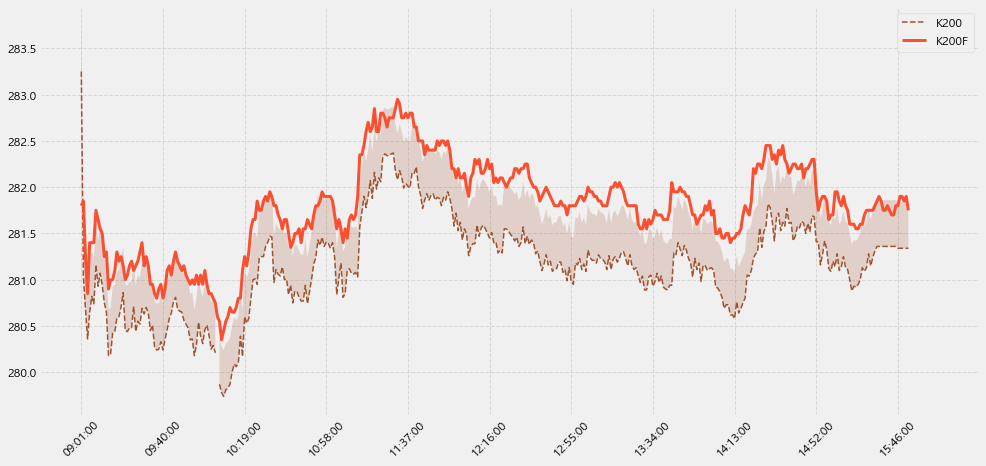

In [9]:
v.futures_basis_view(sample, threshold, pair)

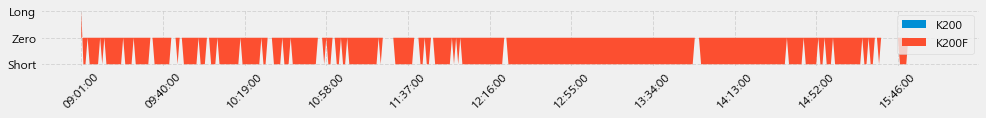

In [10]:
v.position_view(book, pair)